# PyEarthScience:  Python examples for Earth Scientists

## contour plots

### Using matplotlib

#### Contour plot with
    - filled contour areas
    - without contour line labels
    - labelbar
    - title


In [1]:
from   mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
from   netCDF4 import Dataset as open_ncfile
import numpy as np

Show plot in this notebook.

In [2]:
%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


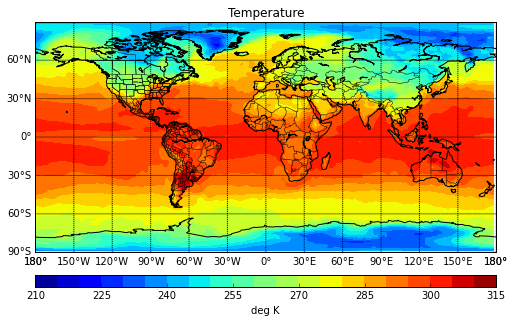

In [3]:
#-- open netcdf file
nc = open_ncfile('/Users/k204045/NCL/general/data/new_data/rectilinear_grid_2D.nc')

#-- read variable
var = nc.variables['tsurf'][0,:,:]
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]

#-- create figure and axes instances
fig = plt.figure(figsize=(8,8))
ax  = fig.add_axes([0.1,0.1,0.8,0.9])

#-- create map
map = Basemap(projection='cyl',llcrnrlat= -90.,urcrnrlat= 90.,\
              resolution='c',  llcrnrlon=-180.,urcrnrlon=180.)

#-- draw coastlines, state and country boundaries, edge of map
map.drawcoastlines()
map.drawstates()
map.drawcountries()

#-- create and draw meridians and parallels grid lines
map.drawparallels(np.arange( -90., 90.,30.),labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,30.),labels=[0,0,0,1],fontsize=10)

#-- convert latitude/longitude values to plot x/y values
x, y = map(*np.meshgrid(lon,lat))

#-- contour levels
clevs = np.arange(210,320,5)

#-- draw filled contours
cnplot = map.contourf(x,y,var,clevs,cmap=plt.cm.jet)

#-- add colorbar
cbar = map.colorbar(cnplot,location='bottom',pad="10%")      #-- pad: distance between map and colorbar
cbar.set_label('deg K')                                      #-- add colorbar title string

#-- add plot title
plt.title('Temperature')

plt.show()
#plt.savefig('plot_contour_filled_rect.png', bbox_inches='tight')